# 4. 그래프 그리기

## 4-1 데이터 시각화가 필요한 이유

In [42]:
#앤스콤 데이터 집합 불러오기
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
print(anscombe) , print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

(None, None)

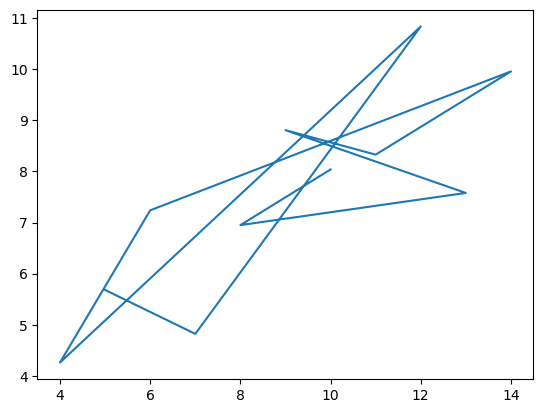

In [44]:
#matplotlib 라이브러리로 그래프 그리기
%matplotlib inline
import matplotlib.pyplot as plt

#데이터 그룹 추출
dataset_1 = anscombe[anscombe['dataset'] == 'I']

#선 그래프 그리기
plt.plot(dataset_1['x'], dataset_1['y'])

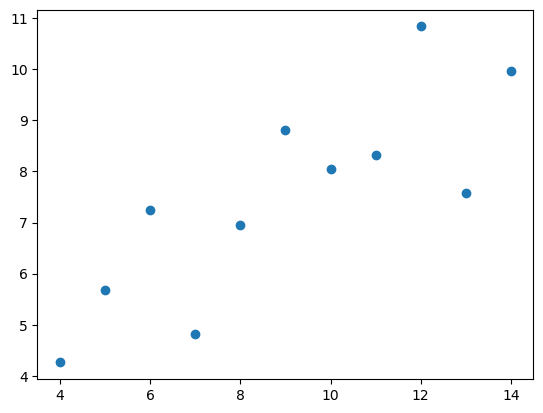

In [46]:
#산포도로 그리기
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

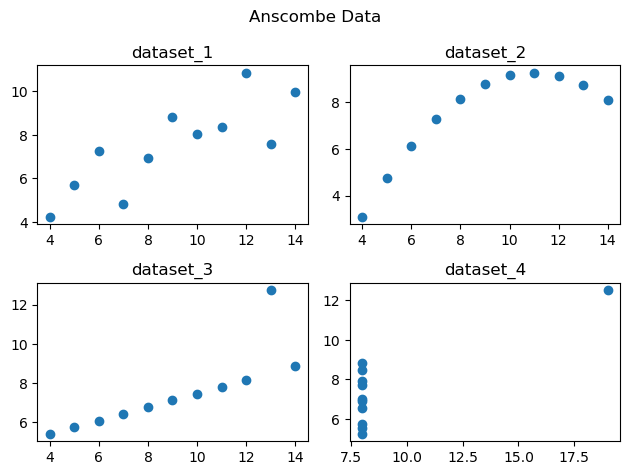

In [48]:
#한 번에 4개의 그래프 그리기

#데이터 그룹 추출
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

#기본 틀 만들기
fig = plt.figure()

#각각의 그래프 격자 그리기
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

#데이터 전달하여 그리기
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

#각 그래프 제목 추가
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

#전체 제목 추가
fig.suptitle('Anscombe Data')

#레이아웃 조절
fig.tight_layout()

## 4-2 matplotlib 라이브러리 자유자재로 사용하기

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 <class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Total Bill')

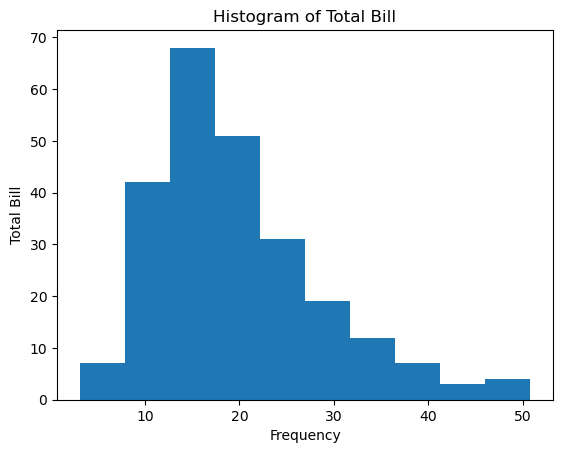

In [57]:
#tips 데이터 집합 불러와 변수로 저장
tips = sns.load_dataset('tips')
print(tips.head() , type(tips))

#기본 틀 마련 및 그래프 격자 구성
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

#히스토그램 그리기
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

Text(0, 0.5, 'Tip')

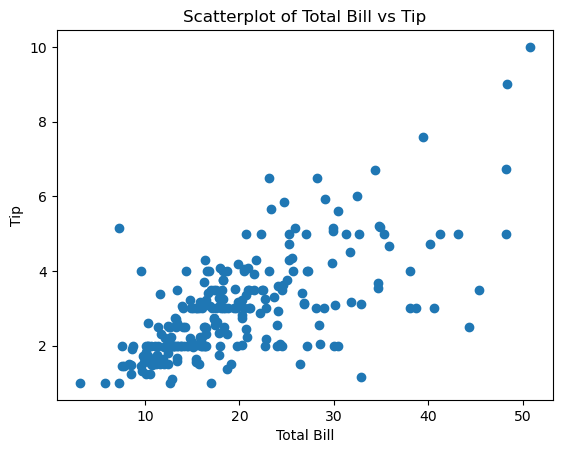

In [59]:
#산점도 그래프 그리기
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

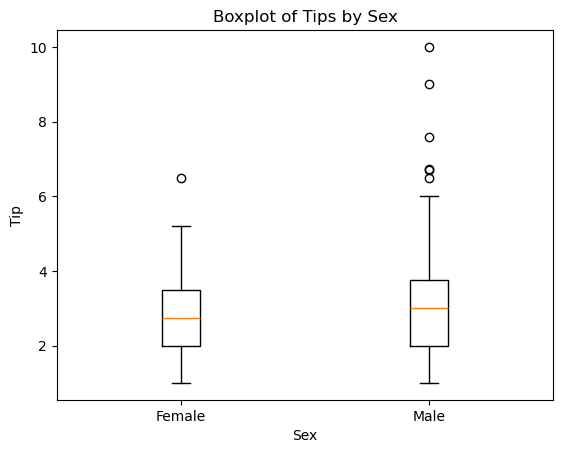

In [61]:
#박스 그래프 그리기
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
                tips[tips['sex'] == 'Male']['tip']],
                labels=['Female','Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

Text(0, 0.5, 'Tip')

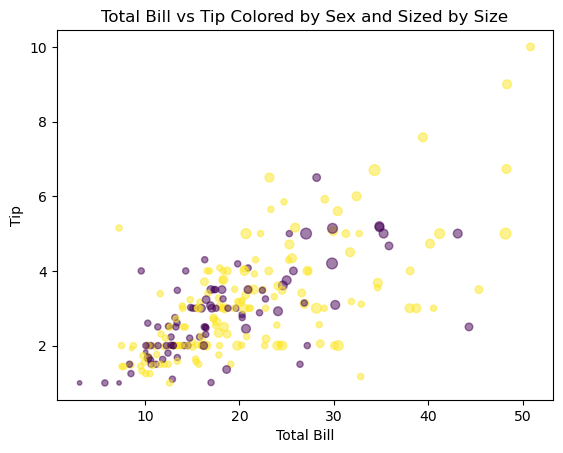

In [65]:
#다변량 산점도 그래프 그리기

#성별 문자열을 정수로 치환
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

#변환 값 데이터 프레임에 추가
tips['sex_color'] = tips['sex'].apply(recode_sex)

#테이블당 인원 수 표현을 고려하여 산점도 그리기
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,
    c=tips['sex_color'],
    alpha=0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 4-3 seaborn 라이브러리 자유자재로 사용하기

/var/folders/k6/73wgcfsd01b1_zt_rzsw500h0000gn/T/ipykernel_69242/469662761.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'])


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

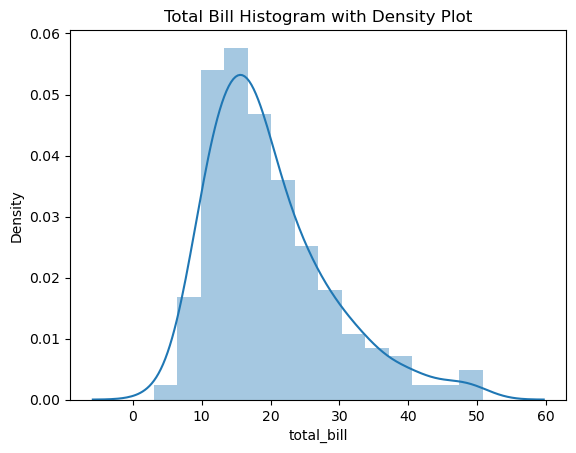

In [82]:
#다변량 히스토그램 그래프 그리기

#데이터집합 불러오기
import seaborn as sns
tips = sns.load_dataset('tips')

#히스토그램 그리기(오류메시지 정상)
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

/var/folders/k6/73wgcfsd01b1_zt_rzsw500h0000gn/T/ipykernel_69242/313834529.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], kde=False)


Text(0, 0.5, 'Frequency')

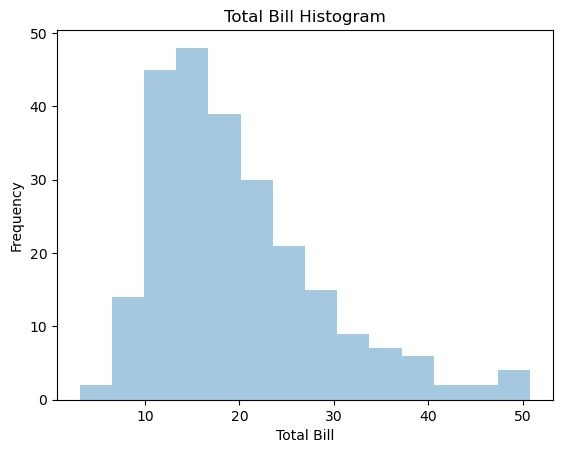

In [84]:
#밀집도 그래프 없이 그리기(그냥 hist로 해도 된다)
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

/var/folders/k6/73wgcfsd01b1_zt_rzsw500h0000gn/T/ipykernel_69242/3911377847.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], hist=False)


Text(0, 0.5, 'Frequency')

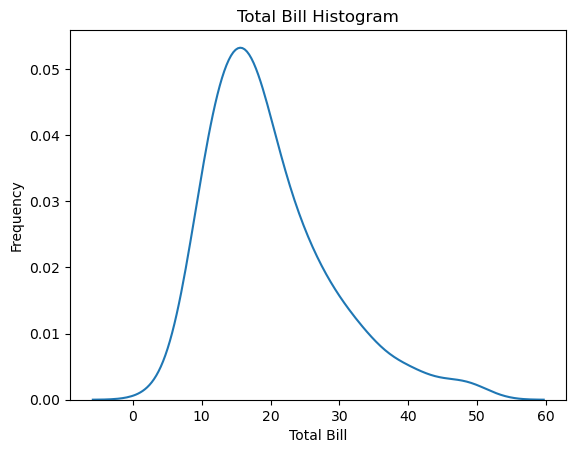

In [86]:
#밀집도 그래프만 나타내기
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

/var/folders/k6/73wgcfsd01b1_zt_rzsw500h0000gn/T/ipykernel_69242/3710865937.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], rug=True)


Text(0.5, 0, 'Total Bill')

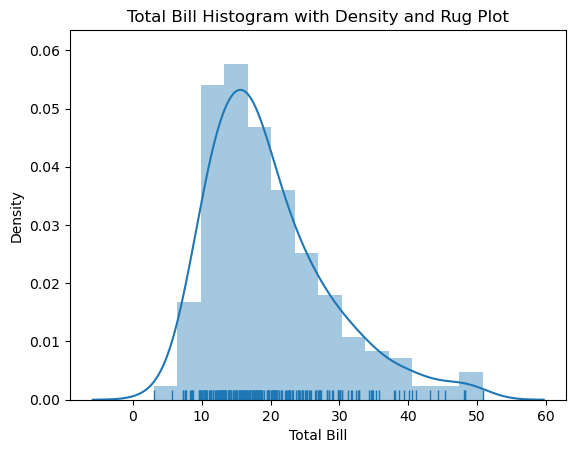

In [88]:
#양탄자 그래프 추가하기
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

Text(0, 0.5, 'Frequency')

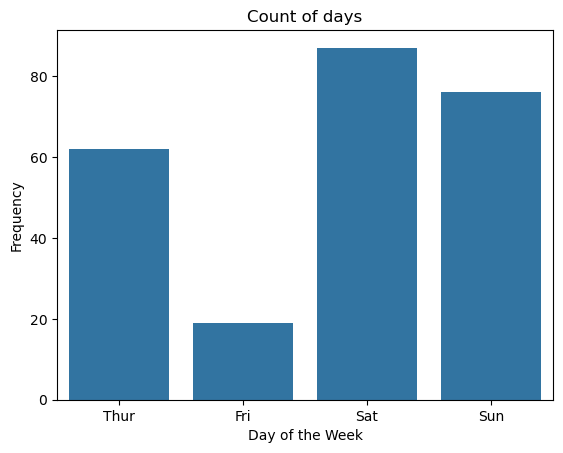

In [100]:
#이산값 그래프 그리기
ax = plt.subplots()
ax = sns.countplot(x = 'day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Tip')

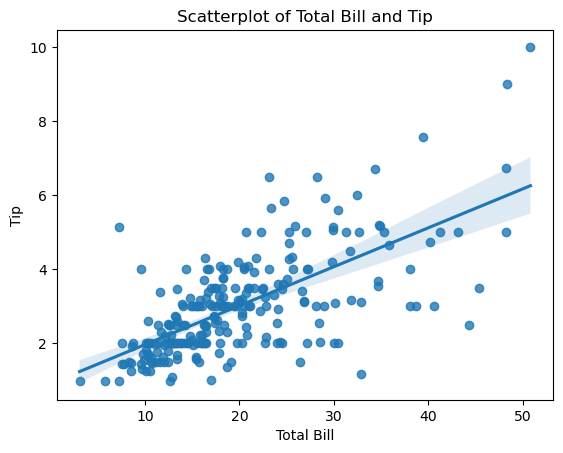

In [104]:
#seaborn 라이브러리로 산점도 그래프 그리기
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips) #fit_reg=False로 회귀선 제거 가능
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

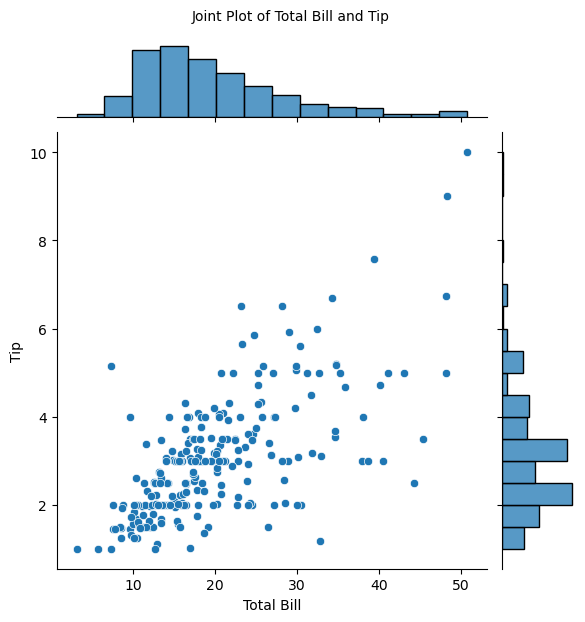

In [106]:
#jointplot 사용하기
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

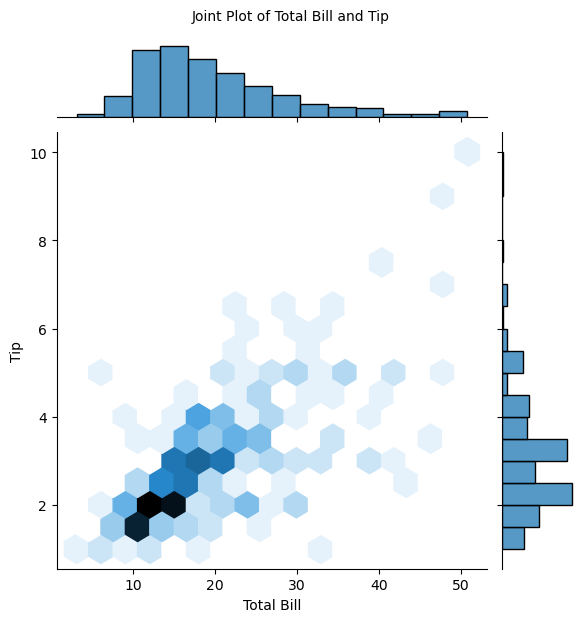

In [108]:
#육각 그래프 그리기
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

/var/folders/k6/73wgcfsd01b1_zt_rzsw500h0000gn/T/ipykernel_69242/1635848221.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=tips['total_bill'],


Text(0, 0.5, 'Tip')

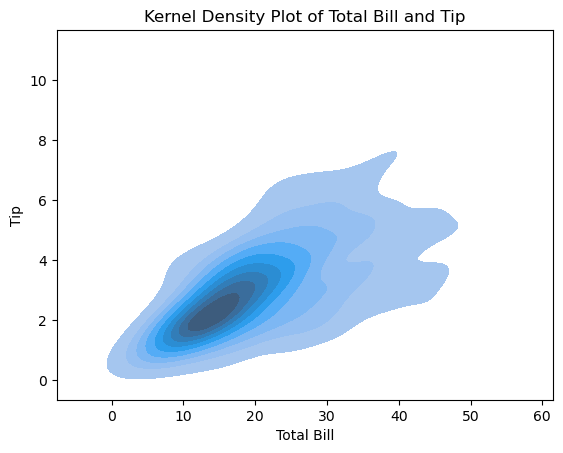

In [112]:
#이차원 밀집도 그리기
ax = plt.subplots()
ax = sns.kdeplot(x=tips['total_bill'],
                y=tips['tip'],
                shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Average total bill')

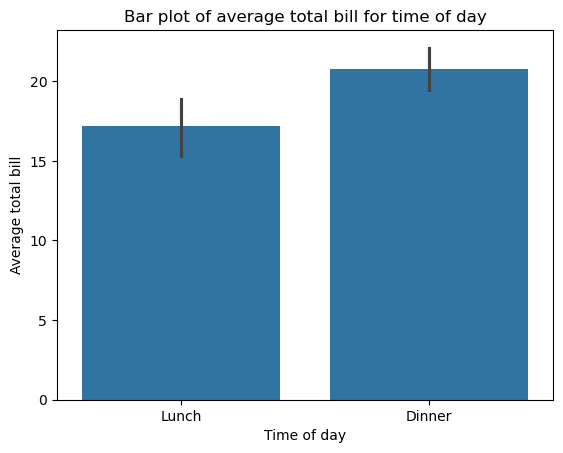

In [114]:
#바 그래프 그리기
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Total bill')

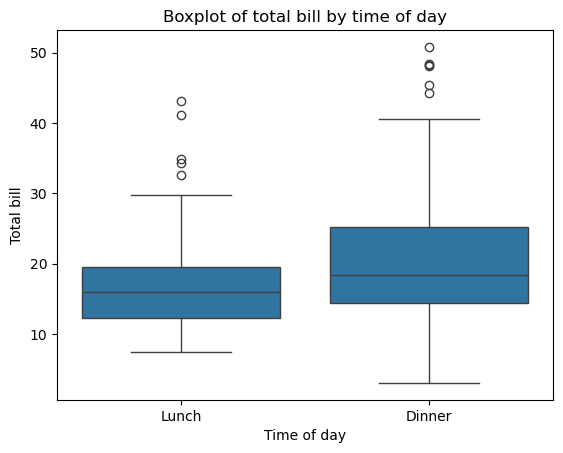

In [118]:
#박스 그래프 그리기
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')

Text(0, 0.5, 'Total bill')

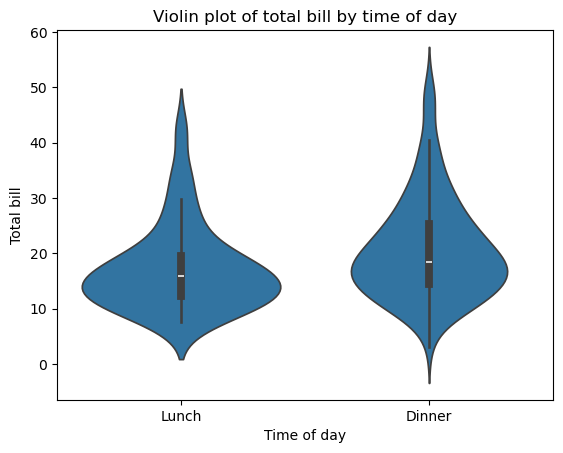

In [120]:
#바이올린 그래프 그리기
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')

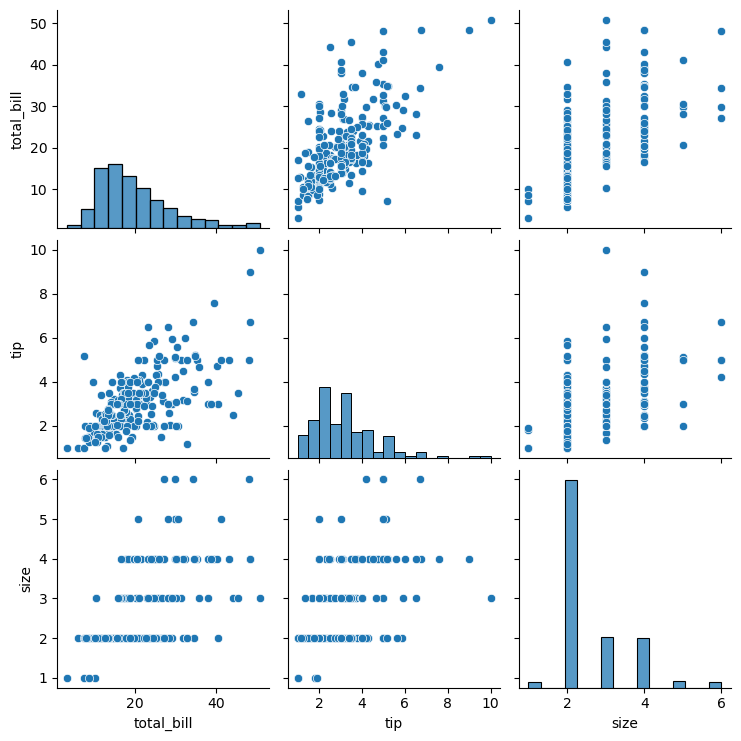

In [122]:
#관계 그래프 그리기
fig = sns.pairplot(tips)

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, co

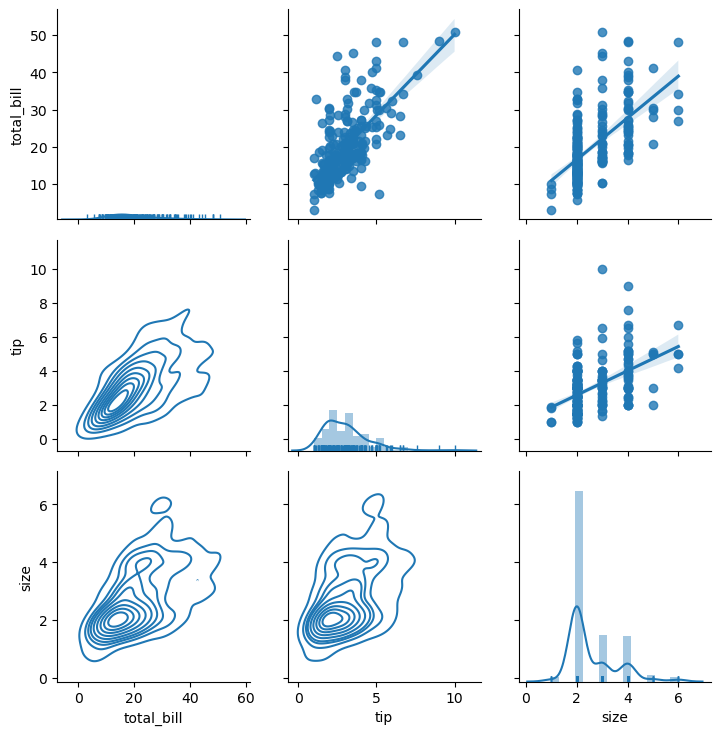

In [126]:
#원하는 위치에 원하는 그래프로 채우기
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

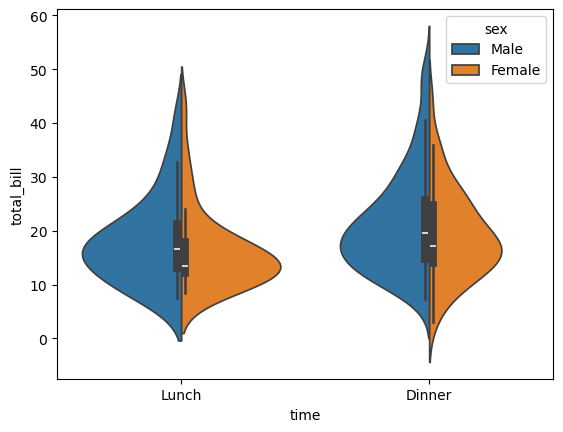

In [128]:
#seaborn 라이브러리로 바이올린 그래프 그리기
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

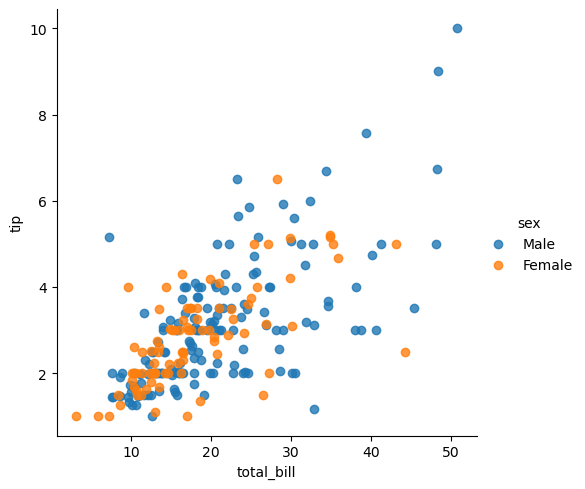

In [150]:
#seaborn 라이브러리로 산점도 그래프 그리기
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

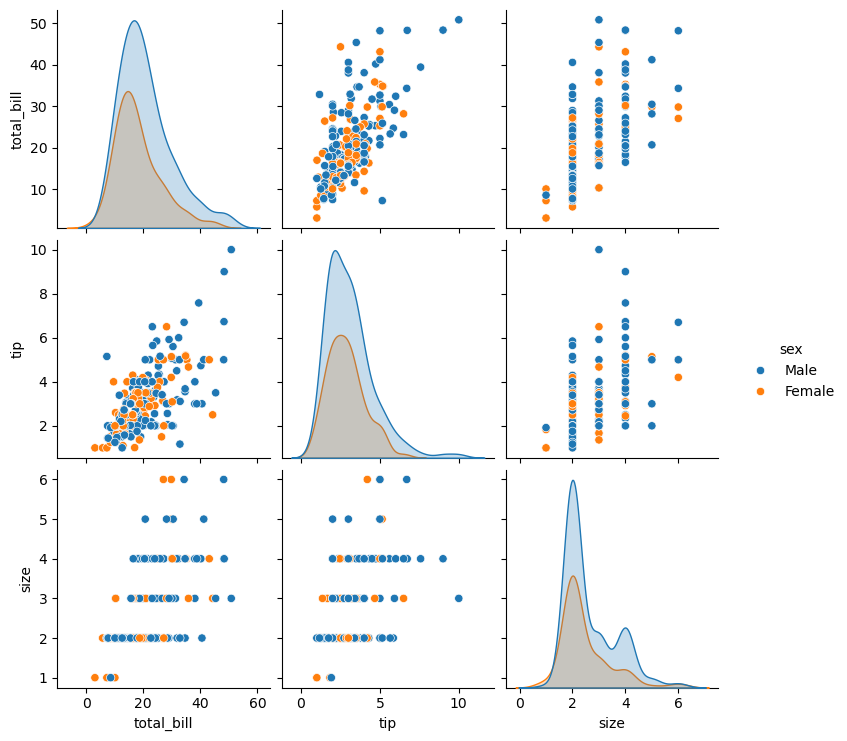

In [156]:
#seaborn 라이브러리로 관계 그래프 그리기
fig = sns.pairplot(tips, hue='sex')

ValueError: s must be a scalar, or float array-like with the same size as x and y

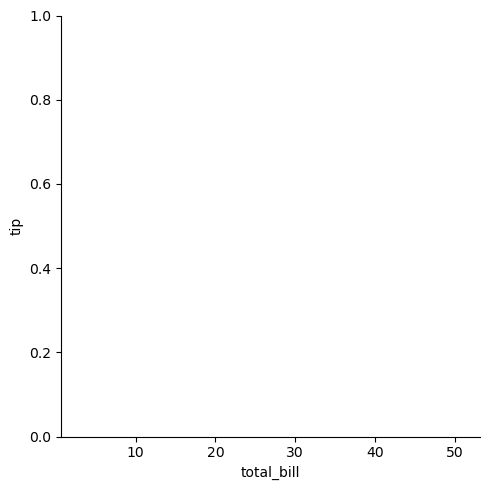

In [158]:
#산점도 그래프 크기와 모양 조절 및 점 기호 바꾸기(왜 오류나는지 모르겠음)
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                    markers=['o','x'], scatter_kws={'s': tips['size']*10})

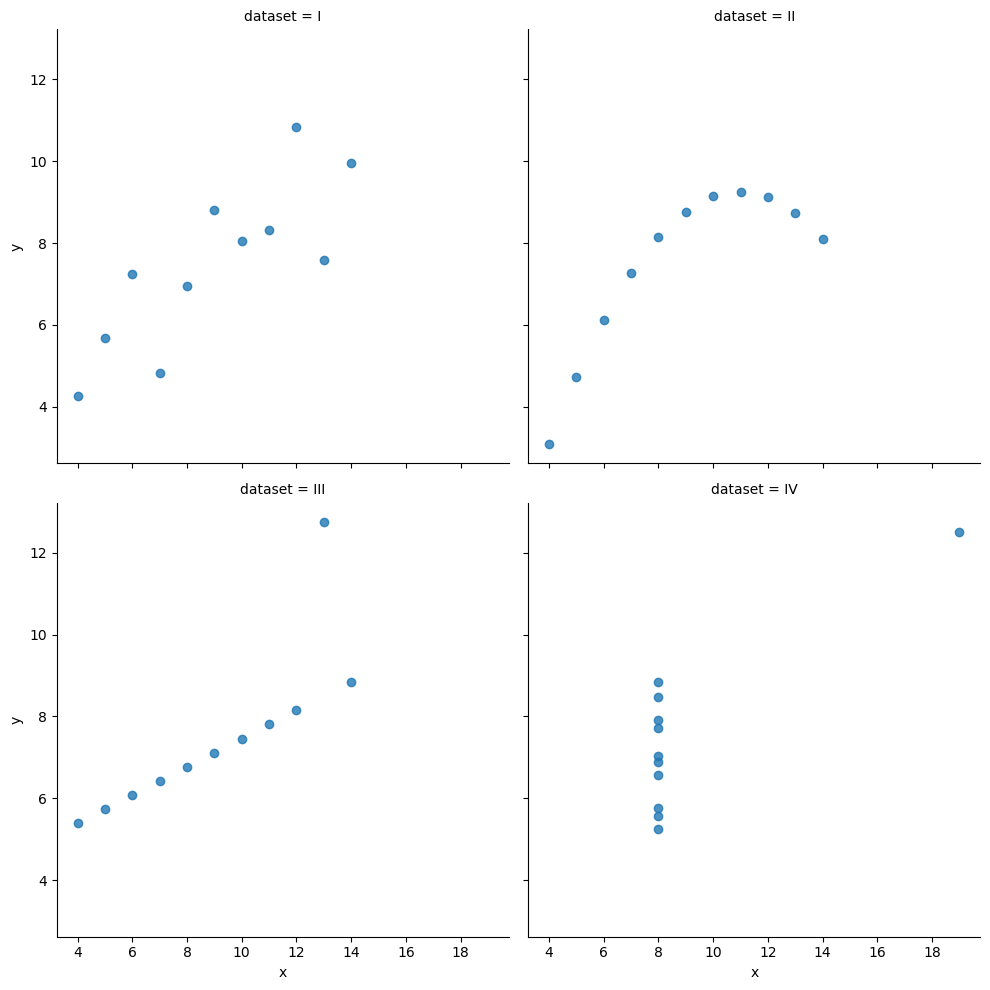

In [162]:
#implot으로 4개의 데이터 그룹 그래프 한번에 그리기
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                          col='dataset', col_wrap=2)

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


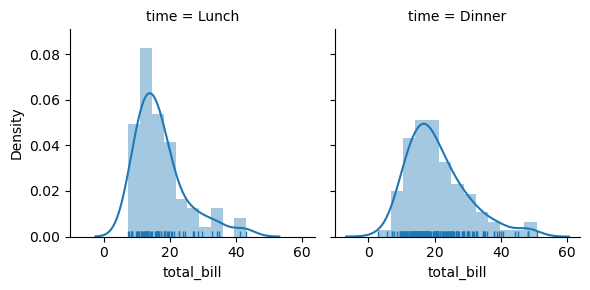

In [164]:
#FacetGrid로 그룹별 그래프 그리기 1
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

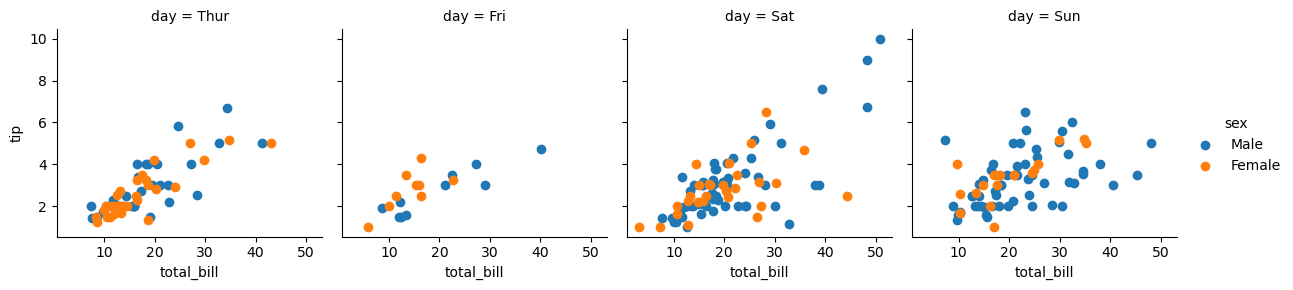

In [168]:
#FacetGrid로 그룹별 그래프 그리기 2
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

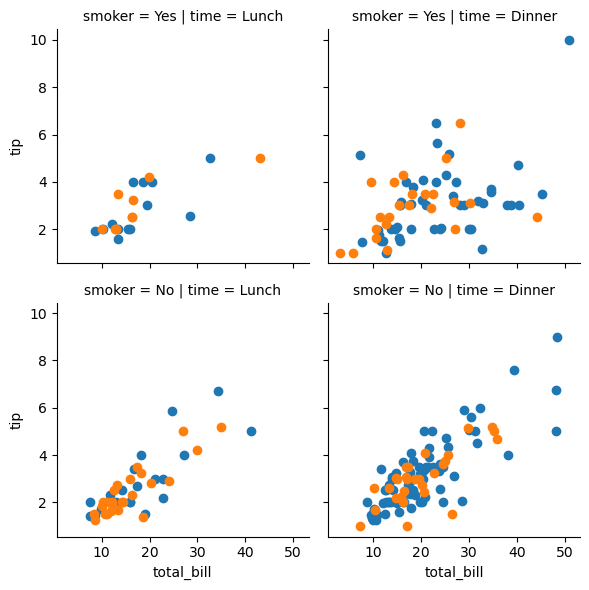

In [170]:
#FacetGrid로 그룹별 그래프 그리기 3
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

## 4-4 데이터프레임과 시리즈로 그래프 그리기

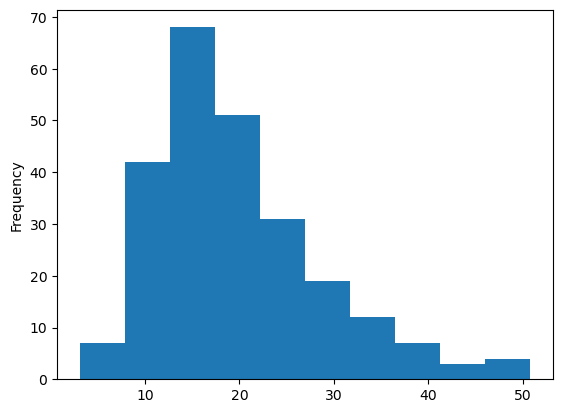

In [175]:
#히스토그램 그리기
ax = plt.subplots()
ax = tips['total_bill'].plot.hist() 

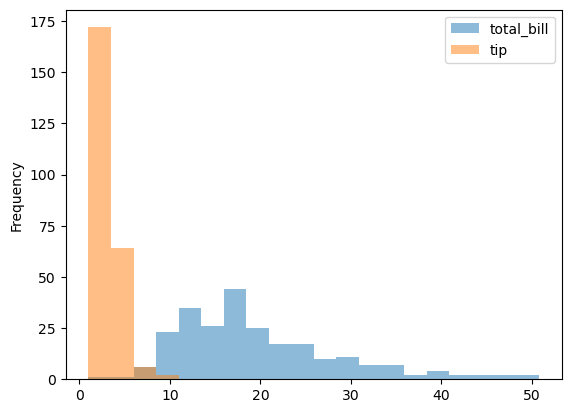

In [181]:
#히스토그램 투명도 조절
fig, ax = plt.subplots() 
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax) 

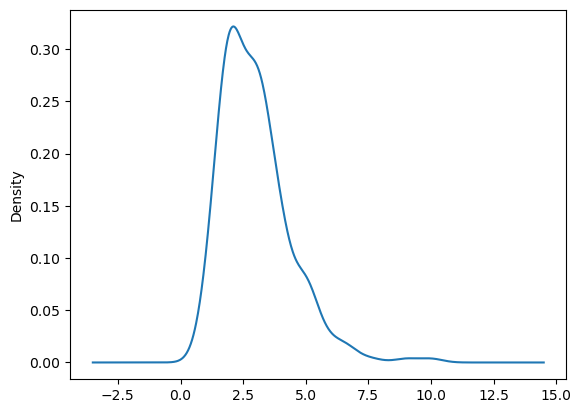

In [183]:
#밀집도 그래프
fig, ax = plt.subplots() 
ax = tips['tip'].plot.kde() 

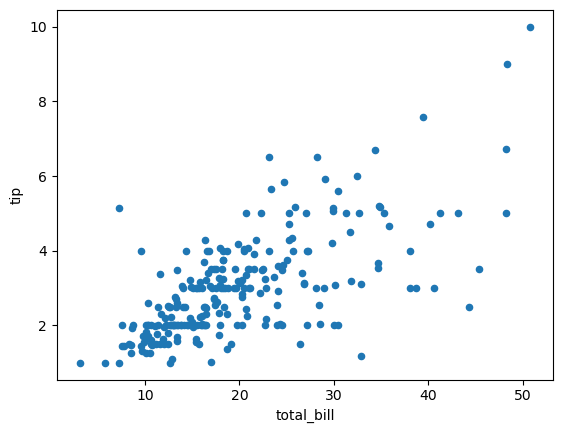

In [187]:
#산점도 그래프
fig, ax = plt.subplots() 
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax) 

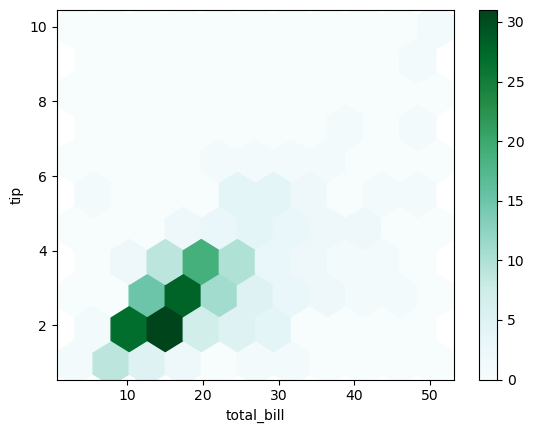

In [189]:
#육각 그래프
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax) 

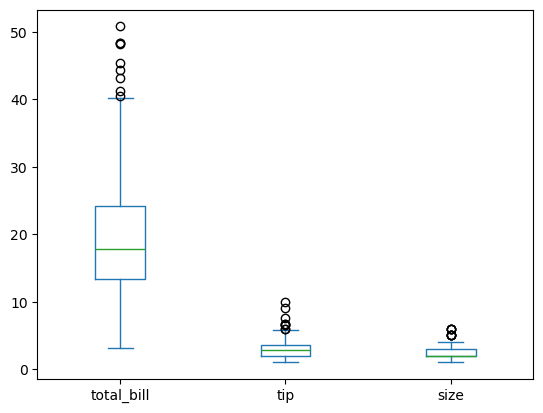

In [191]:
#박스 그래프
fig, ax = plt.subplots() 
ax = tips.plot.box(ax=ax) 

## 4-5 seaborn 라이브러리로 그래프 스타일 설정하기

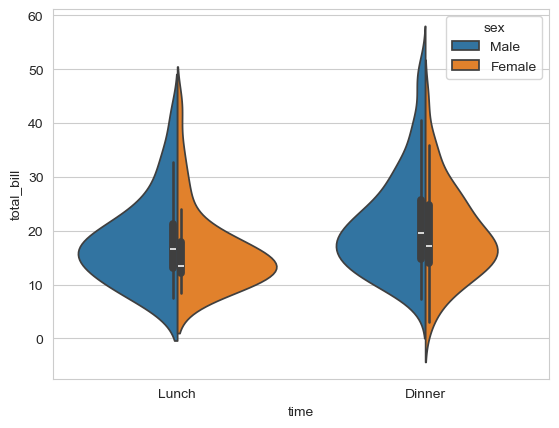

In [194]:
#바이올린 그래프에서 배경에 가로줄 추가
sns.set_style('whitegrid') 
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

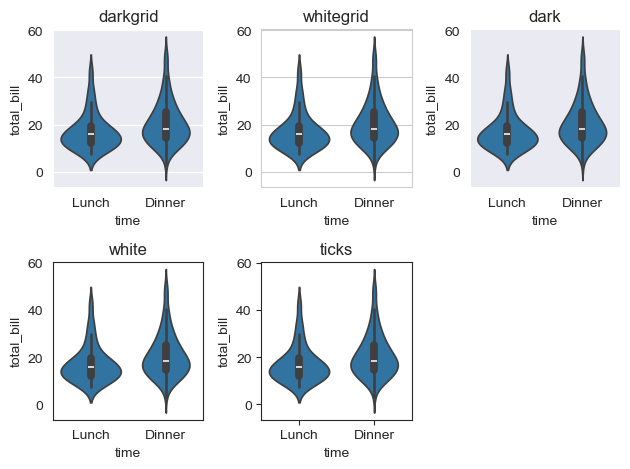

In [196]:
#for문을 이용하여 모든 스타일을 하니씩 적용하기
fig = plt.figure() 
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] 
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style) 
        
fig.tight_layout() 